In [ ]:
# If you're using Google Colab, please run these two commands first
# !wget https://github.com/dvgodoy/PyTorch101_AI_Plus/raw/main/quiz.zip
# !unzip -qo quiz.zip

In [2]:
from IPython.display import display, HTML
display(HTML("""<style>.container { width:90% !important; }.text_cell_render, .output_text {font-family: Lato;font-size: 18px;line-height: 1.5;}.CodeMirror {font-size: 16px;}</style>"""))
from quiz.jupyterquiz import display_quiz

# Module 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## A Simple Problem - Linear Regression

Most tutorials start with some nice and pretty *image classification problem* to illustrate how to use PyTorch. It may seem cool, but I believe it **distracts** you from the **main goal: how PyTorch works**?

For this reason, in this tutorial, I will stick with a **simple** and **familiar** problem: a **linear regression with a single feature x**! It doesn’t get much simpler than that…

$$
\Large y = b + w x + \epsilon
$$

We can also think of it as the **simplest neural network**: one node, one input, one output, linear activation function.

<p align="center">
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_AI_Plus/main/images/NNs_bias_2.png" width="50%" height="50%">
</p>

We can also conceive the very same model structure in a less abstract way:

<br>
<center>
    <h3><strong>salary = minimum wage + increase per year * years of experience + noise</strong></h3>
</center>
<br>

And to make it even more concrete, let's say that the **minimum wage** is **$1,000** (whatever the currency or time frame, this is not important). So, if you have **no experience**, your salary is going to be the **minimum wage** (parameter _b_).

Also, let's say that, **on average**, you get a **\$2,000 increase** (parameter _w_) for every year of experience you have. So, if you have **two years of experience**, you are expected to earn a salary of **\$5,000**. But your actual salary is **\$5,600** (lucky you!). Since the model cannot account for those **extra \$600**, your extra money is, technically speaking, **noise**.

### Data Generation

Let’s start **generating** some synthetic data: we start with a vector of 100 points for our **feature x** and create our **labels** using **b = 1, w = 2** and some Gaussian noise.

In [4]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = .1 * np.random.randn(N, 1)
y = true_b + true_w * x + epsilon

### Train-Validation-Test Split

The split should always be the **first thing you do**—no preprocessing, no transformations; **nothing happens before the split**. That’s why we do this **immediately after the synthetic data generation**.

- ***Training Set***: the data you use to, obviously, ***train*** your model - you can use and abuse this data!


- ***Validation Set***: the data you should only use to ***hyper-parameter tuning***, that is, comparing differently parameterized models trained on the training data, to decide which parameters are best. 

    You should use, but ***not*** abuse this data, as it is intended to provide an ***unbiased*** evaluation of your model and, if you mess around with it too much, you'll end up incorporating knowledge about it in your model without even noticing.


- ***Test Set***: the data you should use only ***once***, when you are done with everything else, to check if your model is still performing well.

    I like to pretend this is data from the **_"future"_** - that particular day in the future when my model is ready to give it a go in the real world! So, until that day, I cannot know this data, as the future hasn't arrived yet :-)
    
![](https://raw.githubusercontent.com/dvgodoy/PyTorch101_AI_Plus/main/images/train_test_split.png)

Next, let’s **split** our synthetic data into **train** and **validation** sets, shuffling the array of indices and using the first 80 shuffled points for training.

In [5]:
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

Text(0.5, 1.0, 'Generated Data - Validation')

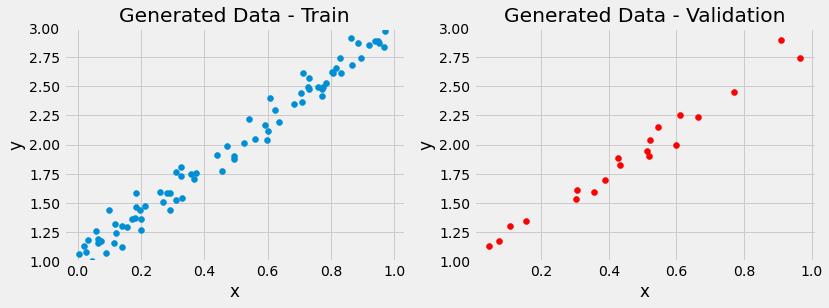

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([1, 3])
ax[0].set_title('Generated Data - Train')
ax[1].scatter(x_val, y_val, c='r')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([1, 3])
ax[1].set_title('Generated Data - Validation')

## PyTorch: tensors, tensors, tensors

In [8]:
#!pip install --quiet torchviz
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

First, we need to cover a **few basic concepts** that may throw you off-balance if you don’t grasp them well enough before going full-force on modeling.

In Deep Learning, we see **tensors** everywhere. Well, Google’s framework is called *TensorFlow* for a reason! *What is a tensor, anyway*?

### Tensors

In *Numpy*, you may have an **array** that has **three dimensions**, right? That is, technically speaking, a **tensor**.

A **scalar** (a single number) has **zero** dimensions, a **vector has one** dimension, a **matrix has two** dimensions and a **tensor has three or more dimensions**. That’s it!

But, to keep things simple, it is commonplace to call vectors and matrices tensors as well — so, from now on, **everything is either a scalar or a tensor**.

![](https://raw.githubusercontent.com/dvgodoy/PyTorch101_AI_Plus/main/images/tensors.png)

You can create **tensors** in PyTorch pretty much the same way you create **arrays** in Numpy. Using [**tensor()**](https://bit.ly/39DRbFv) you can create either a scalar or a tensor.

PyTorch's tensors have equivalent functions as its Numpy counterparts, like: [**ones()**](https://bit.ly/3f9W7TU), [**zeros()**](https://bit.ly/3hKoDgo), [**rand()**](https://bit.ly/2P3sQj5), [**randn()**](https://bit.ly/30b0SIq) and many more.

In [9]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[-0.7290,  0.6708,  0.2293, -1.1518],
         [-1.2728, -0.4332, -1.1476,  0.0110],
         [-0.4375,  0.4285,  0.0212,  1.9229]],

        [[-0.6502, -0.9148, -0.6658, -0.5358],
         [ 0.4365,  0.3877,  0.0603,  0.3948],
         [ 0.5909,  0.6276, -0.7665, -0.5037]]])


You can get the shape of a tensor using its [**size()**](https://pytorch.org/docs/stable/generated/torch.Tensor.size.html#torch.Tensor.size) method or its **shape** attribute.

In [10]:
print(tensor.size(), tensor.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


You can also reshape a tensor using its [**reshape()**](https://pytorch.org/docs/stable/generated/torch.Tensor.reshape.html#torch.Tensor.reshape) or [**view()**](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html#torch.Tensor.view) methods.

Beware: these methods create a new tensor with the desired shape that **shares the underlying data** with the original tensor!

In [11]:
new_tensor1 = tensor.reshape(2, -1)
new_tensor2 = tensor.view(2, -1)
print(new_tensor1.shape, new_tensor2.shape)

torch.Size([2, 12]) torch.Size([2, 12])


If you want to copy all data for real, that is, duplicate it in memory, you should use either its [**new_tensor()**](https://pytorch.org/docs/stable/generated/torch.Tensor.new_tensor.html#torch.Tensor.new_tensor) or [**clone()**](https://pytorch.org/docs/stable/generated/torch.clone.html#torch.clone) methods.

### Loading Data, Devices and CUDA

”*How do we go from Numpy’s arrays to PyTorch’s tensors*”, you ask? 

That’s what [**as_tensor()**](https://bit.ly/3fa9hjy) is good for. It returns a **CPU tensor**, though.

You can also easily **cast** it to a lower precision (32-bit float) using [**float()**](https://pytorch.org/docs/stable/generated/torch.Tensor.float.html#torch.Tensor.float).

In [12]:
# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
x_train_tensor = torch.as_tensor(x_train).float()
y_train_tensor = torch.as_tensor(y_train).float()

print(type(x_train), type(x_train_tensor))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


“*But I want to use my fancy GPU…*”, you say.

No worries, that’s what [**to()**](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html#torch.Tensor.to) is good for. It sends your tensor to whatever **device** you specify, including your **GPU** (referred to as `cuda` or `cuda:0`).

“*What if I want my code to fallback to CPU if no GPU is available?*”, you may be wondering… 

PyTorch got your back once more — you can use [**cuda.is_available()**](https://bit.ly/2ZZfOJL) to find out if you have a GPU at your disposal and set your device accordingly.

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

print(type(x_train), type(x_train_tensor))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


If you compare the **types** of both variables, you’ll get what you’d expect: `numpy.ndarray` for the first one and `torch.Tensor` for the second one.

But where does your nice tensor “live”? In your CPU or your GPU? You can’t say… but if you use PyTorch’s **type()**, it will reveal its **location** — `torch.cuda.FloatTensor` — a GPU tensor in this case.

In [14]:
print(x_train_tensor.type())

torch.cuda.FloatTensor


We can also go the other way around, turning tensors back into Numpy arrays, using [**numpy()**](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html#torch.Tensor.numpy). It should be easy as `x_train_tensor.numpy()` but…

In [15]:
x_train_tensor.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

Unfortunately, Numpy **cannot** handle GPU tensors… you need to make them CPU tensors first using [**cpu()**](https://bit.ly/2OSC1Th).

In [ ]:
x_train_tensor.cpu().numpy()

### Creating Tensor for Parameters

What distinguishes a *tensor* used for *data* — like the ones we’ve just created — from a **tensor** used as a (*trainable*) **parameter/weight**?

The latter tensors require the **computation of its gradients**, so we can **update** their values (the parameters’ values, that is). That’s what the **`requires_grad=True`** argument is good for. It tells PyTorch we want it to compute gradients for us.

---

<h2><b><i>A tensor for a learnable parameter requires gradient!</i></b></h2>

---

You may be tempted to create a simple tensor for a parameter and, later on, send it to your chosen device, as we did with our data, right?

Actually, you should **assign** tensors to a **device** at the moment of their **creation** to avoid unexpected behaviors...

In [16]:
# We can specify the device at the moment of creation - RECOMMENDED!
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

tensor([0.7165], device='cuda:0', requires_grad=True) tensor([-0.9594], device='cuda:0', requires_grad=True)


Now that we know how to create tensors that require gradients, we'll see how PyTorch handles them — that’s the role of PyTorch's Autograd. But, first...

## Quiz

In [17]:
display_quiz('#./quiz/quiz1.b64')

# Exercise #1